In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom

In [10]:
def popSize(Pop):
    idx = np.where(Pop>0)[0]
    return len(idx)

def exponentialGrowth_1(N_init, N_max, repAge):
    N = [N_init]
    Pop = np.zeros(N_max)
    Pop[:N_init] = np.random.randint(1, high=repAge+1, size=N_init)
    while N[-1] < N_max-1:
        idx = np.where(Pop>1)[0]
        Pop[idx] -= 1
        repIdx = np.where(Pop==1)[0]
        Pop[repIdx] = repAge+1
        Pop[N[-1]+1:N[-1]+1+len(repIdx)] = repAge + 1
        N.append(popSize(Pop))
    return N

def exponentialGrowth_2(N_init, N_max, repAge):
    N = [N_init]
    Pop = np.zeros(N_max)
    Pop[:N_init] = np.random.randint(1, high=repAge+1, size=N_init)
    while N[-1] < N_max-1:
        idx = np.where(Pop>1)[0]
        Pop[idx] -= 1
        repIdx = np.where(Pop==1)[0]
        Pop[repIdx] = poisson.rvs(repAge, size=len(repIdx)) + 1+1
        Pop[N[-1]+1:N[-1]+1+len(repIdx)] = poisson.rvs(repAge, size=min(len(repIdx), N_max-N[-1]-1)) + 1
        N.append(popSize(Pop))
    return N

def exponentialGrowth_3(N_init, N_max, repAge):
    N = [N_init]
    Pop = np.zeros(N_max)
    Pop[:N_init] = np.random.randint(1, high=repAge+1, size=N_init)
    while N[-1] < N_max-1:
        idx = np.where(Pop>1)[0]
        Pop[idx] -= 1
        repIdx = np.where(Pop==1)[0]
        Pop[repIdx] = geom.rvs(np.log(2)/repAge, size=len(repIdx)) + 1
        Pop[N[-1]+1:N[-1]+1+len(repIdx)] = geom.rvs(np.log(2)/repAge, size=min(len(repIdx), N_max-N[-1]-1)) + 1
        N.append(popSize(Pop))
    return N

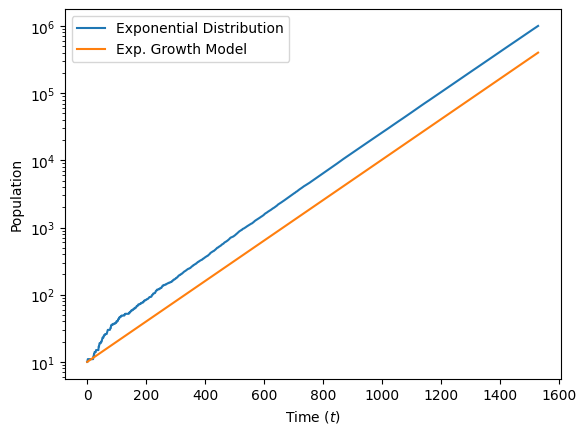

In [13]:
N_init = 10
N_max = 1000000
repAge = 100

N = exponentialGrowth_3(N_init, N_max, repAge)
plt.semilogy(N, label="Exponential Distribution")
plt.semilogy(N_init*np.exp(np.arange(len(N))*np.log(2)/repAge), label="Exp. Growth Model")

plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population")
plt.legend()

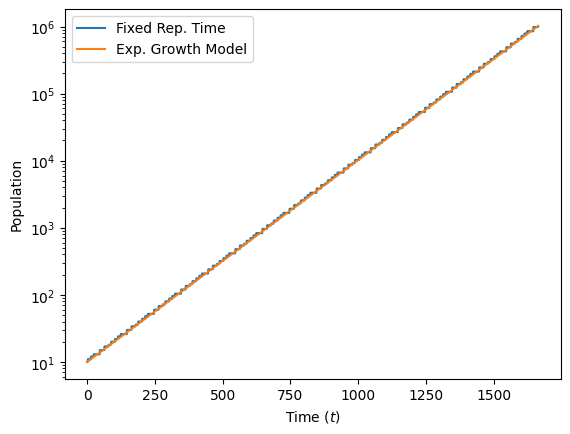

In [7]:
N_init = 10
N_max = 1000000
repAge = 100

N = exponentialGrowth_1(N_init, N_max, repAge)
plt.semilogy(N, label="Fixed Rep. Time")
plt.semilogy(N_init*np.exp(np.arange(len(N))*np.log(2)/repAge), label="Exp. Growth Model")

plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population")
plt.legend()

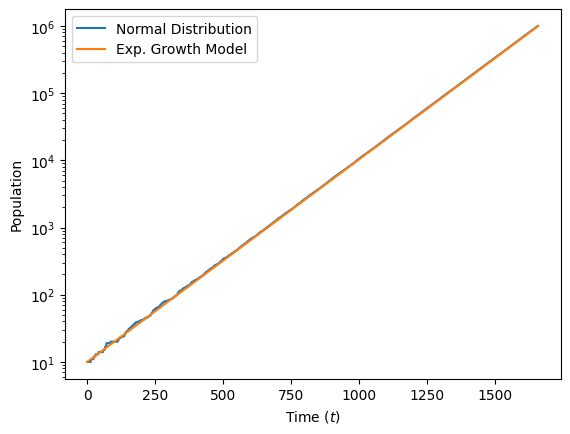

In [9]:
N_init = 10
N_max = 1000000
repAge = 100

N = exponentialGrowth_2(N_init, N_max, repAge)
plt.semilogy(N, label="Normal Distribution")
plt.semilogy(N_init*np.exp(np.arange(len(N))*np.log(2)/repAge), label="Exp. Growth Model")

plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population")
plt.legend()

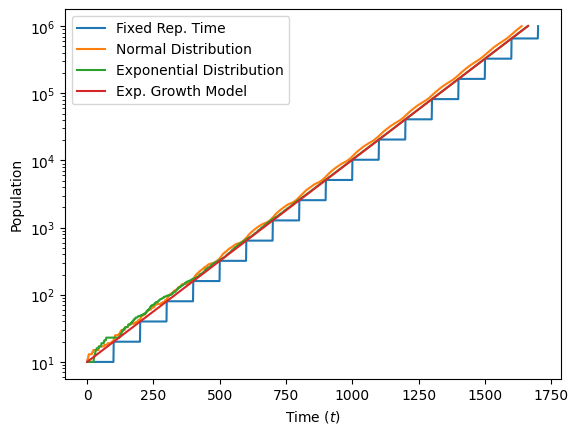

In [7]:
N_init = 10
N_max = 1000000
repAge = 100

N = exponentialGrowth_1(N_init, N_max, repAge)
plt.semilogy(N, label="Fixed Rep. Time")
N = exponentialGrowth_2(N_init, N_max, repAge)
plt.semilogy(N, label="Normal Distribution")
N = exponentialGrowth_3(N_init, N_max, repAge)
plt.semilogy(N, label="Exponential Distribution")
plt.semilogy(N_init*np.exp(np.arange(len(N))*np.log(2)/repAge), label="Exp. Growth Model")

plt.xlabel(r"Time ($t$)")
plt.ylabel(r"Population")
plt.legend()